<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/RandomForests/RandomForestIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [4]:
X, y, = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [5]:
df = pd.DataFrame(X , columns=["col1", "col2","col3","col4","col5"])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.060344,0.131325,-1.338946,1.870441,3.369262,1
1,0.370172,-1.496395,-2.379688,-0.691367,1.935178,0
2,0.692662,0.086331,1.035146,2.188794,2.140735,1
3,0.728353,0.712153,-1.481417,0.982397,-0.146325,0
4,1.000983,-0.682877,-0.517536,2.696049,1.634339,0


In [6]:
# function for row sampling

def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]), replace=True)

In [74]:
import random

In [85]:
# function for column sampling

def sample_features(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent* (df.shape[1] - 1)))
  new_df = df[cols]
  new_df["target"] = df["target"]
  return new_df

In [86]:
# function for combined sampling

def combined_samping(df, row_p, col_p):
  new_df = sample_rows(df, row_p)
  return sample_features(new_df, col_p)

In [10]:
df.shape

(100, 6)

In [33]:
df1 = sample_rows(df, 0.2)

In [34]:
df2 = sample_rows(df, 0.2)

In [35]:
df3 = sample_rows(df, 0.2)

In [36]:
df1.shape, df2.shape, df3.shape

((20, 6), (20, 6), (20, 6))

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [38]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:,0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

In [39]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9, 'X[0] <= -1.521\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= -0.099\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -1.102\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2222222222222222, 0.3, 'X[2] <= -1.103\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.7777777777777778, 0.5, 'X[1] <= -1.067\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

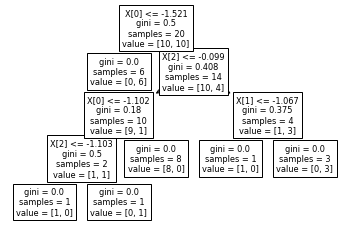

In [40]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'X[0] <= -0.427\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.5, 'X[4] <= 3.668\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

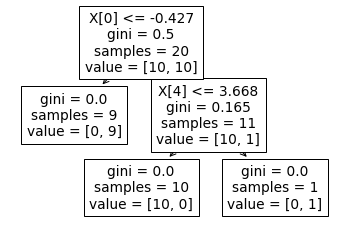

In [41]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.012\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

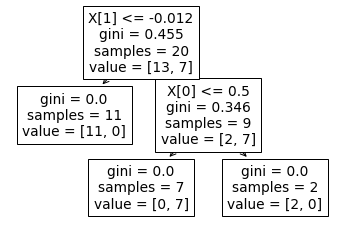

In [42]:
plot_tree(clf3)

In [99]:
a = df.sample()
print(a)
inp = a.iloc[-1,:-1]
print(inp)

        col1      col2      col3      col4      col5  target
58  2.034125 -2.622653  0.580683  1.146559  2.317531       0
col1    2.034125
col2   -2.622653
col3    0.580683
col4    1.146559
col5    2.317531
Name: 58, dtype: float64


In [64]:
clf1.predict(np.array(inp).reshape(1, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [65]:
clf2.predict(np.array(inp).reshape(1, 5))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [66]:
clf3.predict(np.array(inp).reshape(1, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [87]:
sample_features(df, 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,col3,col4,target
0,-1.338946,1.870441,1
1,-2.379688,-0.691367,0
2,1.035146,2.188794,1
3,-1.481417,0.982397,0
4,-0.517536,2.696049,0
...,...,...,...
95,-1.958287,3.160038,1
96,-1.642103,-1.575373,1
97,-0.501894,1.036324,1
98,-1.313924,-1.083553,1


In [88]:
df1 = sample_features(df, 0.8)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,col3,col5,col1,col4,target
0,-1.338946,3.369262,-1.060344,1.870441,1
1,-2.379688,1.935178,0.370172,-0.691367,0
2,1.035146,2.140735,0.692662,2.188794,1
3,-1.481417,-0.146325,0.728353,0.982397,0
4,-0.517536,1.634339,1.000983,2.696049,0
...,...,...,...,...,...
95,-1.958287,2.925416,-1.705607,3.160038,1
96,-1.642103,0.603817,-2.152542,-1.575373,1
97,-0.501894,1.133891,-0.514614,1.036324,1
98,-1.313924,-1.766152,-1.664797,-1.083553,1


In [89]:
df2 = sample_features(df, 0.8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
df3 = sample_features(df, 0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
df3.shape

(100, 5)

In [108]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [109]:
clf1.fit(df1.iloc[:,0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:,0:4], df2.iloc[:, -1])
clf3.fit(df3.iloc[:,0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.40625, 0.9375, 'X[2] <= -0.459\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.125, 0.8125, 'X[2] <= -1.521\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.0625, 0.6875, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.1875, 0.6875, 'X[2] <= -1.19\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5625, 'X[0] <= -2.231\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.1875, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3125, 0.4375, 'X[1] <= -0.817\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.3125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6875, 0.8125, 'X[0] <= 0.461\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.5625, 0.6875, 'X[2] <= 0.405\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.5, 0.5625, 'X[0] <= -0.781\ngini = 0.469\nsamples = 16\nvalue = 

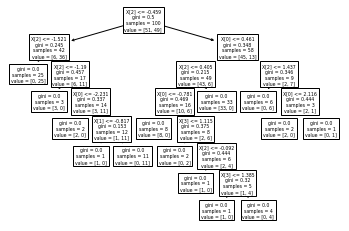

In [110]:
plot_tree(clf1)

[Text(0.40625, 0.9375, 'X[2] <= -0.459\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.125, 0.8125, 'X[2] <= -1.521\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.0625, 0.6875, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.1875, 0.6875, 'X[0] <= -0.413\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5625, 'X[2] <= -1.16\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.1875, 0.4375, 'X[0] <= 0.539\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3125, 0.4375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6875, 0.8125, 'X[1] <= 0.461\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.5625, 0.6875, 'X[2] <= 0.405\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.5, 0.5625, 'X[1] <= -0.781\ngini = 0.469\nsamples = 16\nvalue = [10

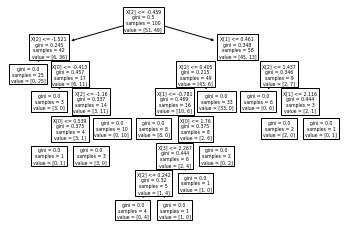

In [111]:
plot_tree(clf2)

[Text(0.45454545454545453, 0.9285714285714286, 'X[0] <= -0.459\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.18181818181818182, 0.7857142857142857, 'X[0] <= -1.521\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.2727272727272727, 0.6428571428571429, 'X[2] <= -0.413\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.36363636363636365, 0.5, 'X[0] <= -1.16\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.2727272727272727, 0.35714285714285715, 'X[1] <= 0.733\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.18181818181818182, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.36363636363636365, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.35714285714285715, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7272727272

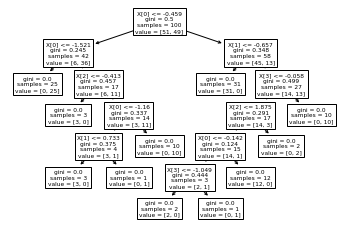

In [112]:
plot_tree(clf3)

In [113]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'col1', 'col4', 'target'], dtype='object')
Index(['col5', 'col3', 'col1', 'col4', 'target'], dtype='object')
Index(['col1', 'col2', 'col5', 'col3', 'target'], dtype='object')


In [114]:
b = df1.sample()
print(b)
inp = b.iloc[-1,:-1]
print(inp)

        col3      col5      col1      col4  target
74 -1.466718  1.560053 -2.093004  1.285388       1
col3   -1.466718
col5    1.560053
col1   -2.093004
col4    1.285388
Name: 74, dtype: float64


In [115]:
clf1.predict(np.array(inp).reshape(1, 4))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [116]:
clf2.predict(np.array(inp).reshape(1, 4))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [117]:
clf3.predict(np.array(inp).reshape(1, 4))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
combined_samping(df, 0.5, 0.5).shape

In [119]:
df1 = combined_samping(df, 0.5, 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
df2 = combined_samping(df, 0.5, 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
df3 = combined_samping(df, 0.5, 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
df3.sample()

,col3,col1,target
2,1.035146,0.692662,1


In [131]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [132]:
clf1.fit(df1.iloc[:,0:2], df1.iloc[:, -1])
clf2.fit(df2.iloc[:,0:2], df2.iloc[:, -1])
clf3.fit(df3.iloc[:,0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.9375, 'X[0] <= -0.97\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5, 0.8125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7, 0.8125, 'X[1] <= -1.017\ngini = 0.342\nsamples = 32\nvalue = [7, 25]'),
 Text(0.6, 0.6875, 'X[0] <= 1.904\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.5, 0.5625, 'X[0] <= 0.649\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.2, 0.4375, 'X[1] <= -2.325\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.1, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.3125, 'X[1] <= -1.456\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4, 0.1875, 'X[0] <= -0.812\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.4375, 'X[1] <= -1.849\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.7, 0.3125, 'X[1] <= -2.33\n

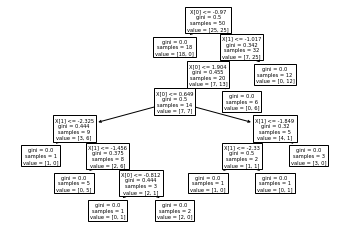

In [133]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.875, 'X[0] <= 0.247\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.2222222222222222, 0.625, 'X[0] <= -0.459\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= -0.292\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.625, 'X[1] <= 2.005\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.7777777777777778, 0.375, 'X[0] <= 1.437\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

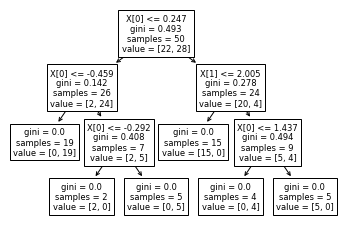

In [134]:
plot_tree(clf2)

[Text(0.4583333333333333, 0.9, 'X[1] <= -0.222\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.25, 0.7, 'X[0] <= -2.504\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= -1.797\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 0.216\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(0.5, 0.5, 'X[1] <= -0.149\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.4166666666666667, 0.3, 'X[0] <= -1.049\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.8333333333333334, 0.5, 'X[1] <

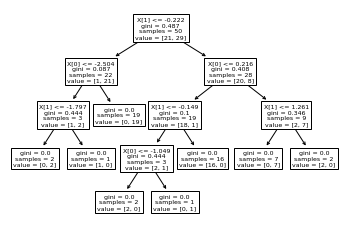

In [135]:
plot_tree(clf3)

In [136]:
b = df1.sample()
print(b)
inp = b.iloc[-1,:-1]
print(inp)

        col2      col3  target
48 -2.532696 -2.698512       0
col2   -2.532696
col3   -2.698512
Name: 48, dtype: float64


In [137]:
clf1.predict(np.array(inp).reshape(1, 2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [138]:
clf2.predict(np.array(inp).reshape(1, 2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [139]:
clf3.predict(np.array(inp).reshape(1, 2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])